In [7]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

# Import the Losses class from losses.py (not sure why this isn't working)
# from src.models.losses import Losses
# Instead run the losses.py file to make the Losses class available
%run ../src/models/losses.py
losses = Losses()

Positional Loss: 0.10285091400146484
Sparsity Loss: 0.29806438088417053
Distance Penalty: 1.0
Number of Spikes Penalty: 0.0
Total Loss: 1.400915265083313


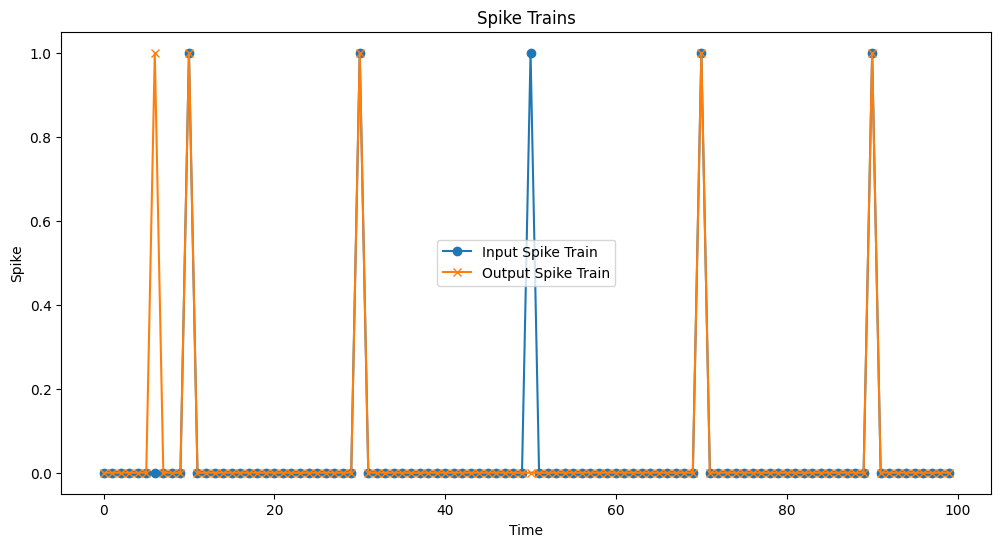

In [3]:
# CHECK WHAT TWO SIMILAR SPIKE TRAINS RETURNS
# Create two similar spike trains
spike_train_input = torch.zeros(100)
spike_train_input[10] = 1
spike_train_input[30] = 1
spike_train_input[50] = 1
spike_train_input[70] = 1
spike_train_input[90] = 1

spike_train_output = spike_train_input.clone()
spike_train_output[50] = 0
spike_train_output[6] = 1  # Introduce a small difference

# Initialize the Losses class
losses = Losses()

# Compute the losses
positional_loss = losses.positional_loss(spike_train_output, spike_train_input)
convolved_input = losses.positional_loss(spike_train_output, spike_train_input, visualising_convolved=True)[1]
sparsity_loss = losses.sparsity_loss(spike_train_output, bin_width=0.1)
distance_penalty = losses.distance_penalty(spike_train_output, D_min=5)
num_spikes_penalty = losses.num_spikes_penalty(spike_train_output, N_max=5)

# Sum of all losses
total_loss = positional_loss + sparsity_loss + distance_penalty + num_spikes_penalty

# Print the losses
print(f"Positional Loss: {positional_loss.item()}")
print(f"Sparsity Loss: {sparsity_loss.item()}")
print(f"Distance Penalty: {distance_penalty.item()}")
print(f"Number of Spikes Penalty: {num_spikes_penalty.item()}")
print(f"Total Loss: {total_loss.item()}")

# Visualize the spike trains
plt.figure(figsize=(12, 6))
plt.plot(spike_train_input.numpy(), label='Input Spike Train', marker='o')
plt.plot(spike_train_output.numpy(), label='Output Spike Train', marker='x')
plt.legend()
plt.title('Spike Trains')
plt.xlabel('Time')
plt.ylabel('Spike')
plt.show()

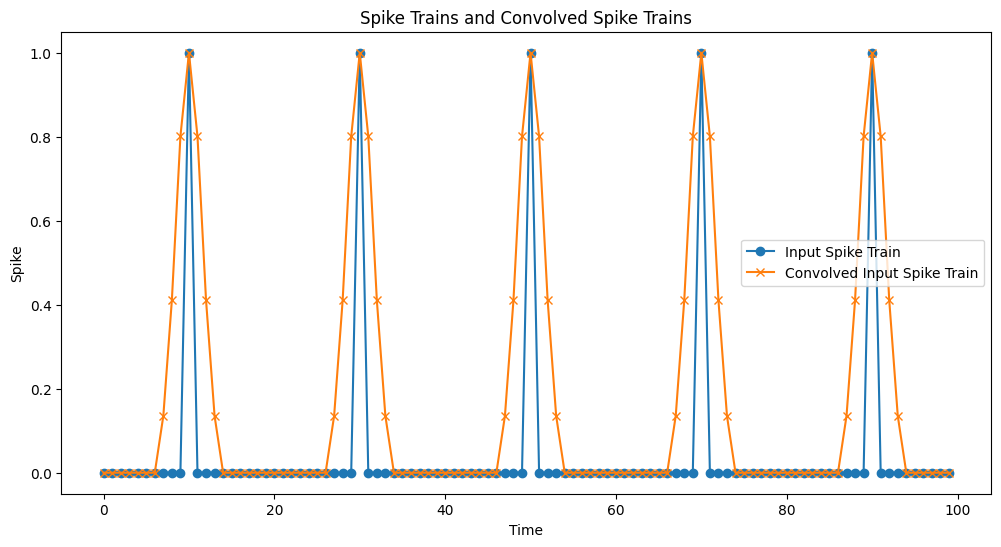

In [4]:
# Visualize the spike trains and convolved spike trains
plt.figure(figsize=(12, 6))
plt.plot(spike_train_input.numpy(), label='Input Spike Train', marker='o')
plt.plot(convolved_input.numpy(), label='Convolved Input Spike Train', marker='x')
plt.legend()
plt.title('Spike Trains and Convolved Spike Trains')
plt.xlabel('Time')
plt.ylabel('Spike')
plt.show()

In [5]:
# Create toy spike train data (batch_size=1, num_rows=3, num_timebins=6)
torch.manual_seed(42)

# Ground truth spike trains
trains_input = torch.tensor([[[1, 0, 1, 0, 1, 0],  # Neuron 1
                                   [0, 1, 0, 1, 0, 1],  # Neuron 2
                                   [1, 1, 0, 0, 1, 1]]], dtype=torch.float)  # Neuron 3

# Predicted spike trains (shuffled rows)
trains_output = torch.tensor([[[0, 1, 0, 1, 0, 1],  # Matches Neuron 2
                                    [1, 1, 0, 0, 1, 1],  # Matches Neuron 3
                                    [1, 0, 1, 0, 1, 0]]], dtype=torch.float)  # Matches Neuron 1

# Compute Hungarian loss (row-invariant) for only positional loss
invariant_loss = losses.hungarian_loss(trains_output, trains_input, loss_fn=losses.positional_loss)

print("\nPermutation-Invariant Loss:", invariant_loss.item())

Batch 1: Matched rows:
  - Input row 0 matched with Model output row 2
  - Input row 1 matched with Model output row 0
  - Input row 2 matched with Model output row 1

Permutation-Invariant Loss: 1.995116114616394


In [8]:
# Compute Hungarian loss (row-invariant) with all the loss terms
invariant_total_loss = losses.hungarian_loss(trains_output, trains_input, loss_fn=losses.total_loss)

print("\nPermutation-Invariant Total Loss:", invariant_total_loss.item())

Batch 1: Matched rows:
  - Input row 0 matched with Model output row 2
  - Input row 1 matched with Model output row 0
  - Input row 2 matched with Model output row 1

Permutation-Invariant Total Loss: 1.9889963865280151
